In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
Data = pd.read_csv("imdb_top_1000.csv")

In [46]:
Data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",The Shawshank Redemption,1994,A,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,"https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,"https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [48]:
# Check if there are any NULL values
Data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [49]:
Data.describe()[['IMDB_Rating','Meta_score','No_of_Votes']]

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [51]:
chartData = Data.groupby(['Director']).agg(['sum'])
PartyVotes = list(chartData['No_of_Votes']['sum'])
keys = list(Data.groupby(['Director']).groups.keys())
Votes = pd.DataFrame({'Director':keys,"Votes":PartyVotes})

Votes.head()

,Director,Votes
0,Aamir Khan,168895
1,Aaron Sorkin,89896
2,Abdellatif Kechiche,138741
3,Abhishek Chaubey,27175
4,Abhishek Kapoor,32628


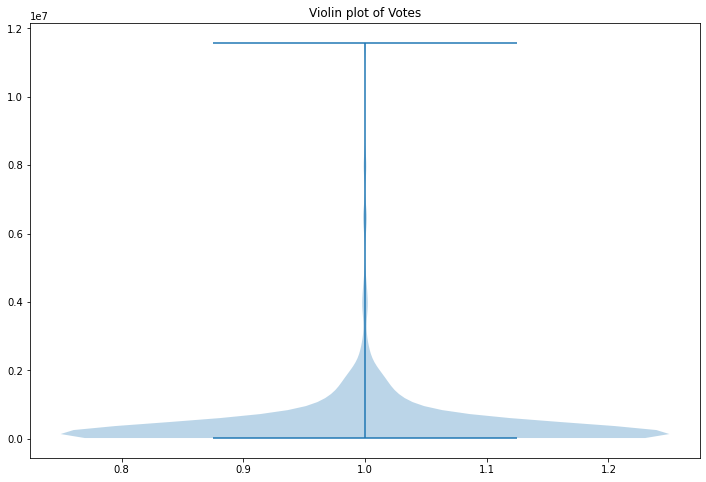

In [53]:
plt.violinplot(Votes['Votes'])
plt.title("Violin plot of Votes")
plt.show()

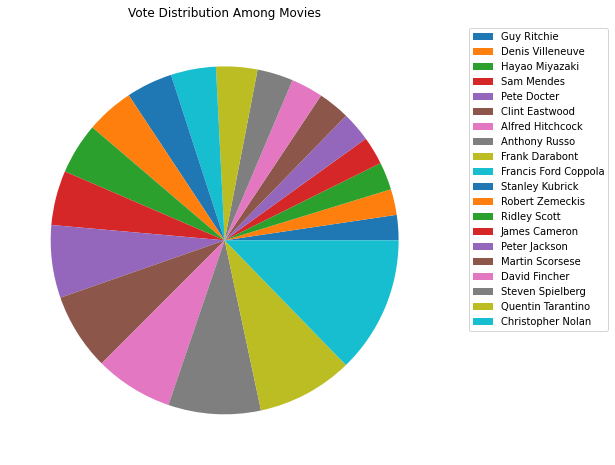

In [56]:
TopParties = Votes.sort_values(by=['Votes']).iloc[-20:]
colours,text = plt.pie(TopParties['Votes'])
plt.legend(TopParties['Director'],bbox_to_anchor=(1.05, 1))
plt.title("Vote Distribution Among Movies")
plt.show()

In [ ]:
#regression

In [68]:
Tvotes = Data[["No_of_Votes","Meta_score"]]
PercentVotes = list(Data["Gross"])

In [69]:
#IMPORT LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(Tvotes, PercentVotes, test_size=0.2, random_state=9)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

predictedResults = reg.predict(X_test)


print("Error in prediction =",reg.score(X_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#CLUSTERING

In [71]:
from sklearn.cluster import KMeans

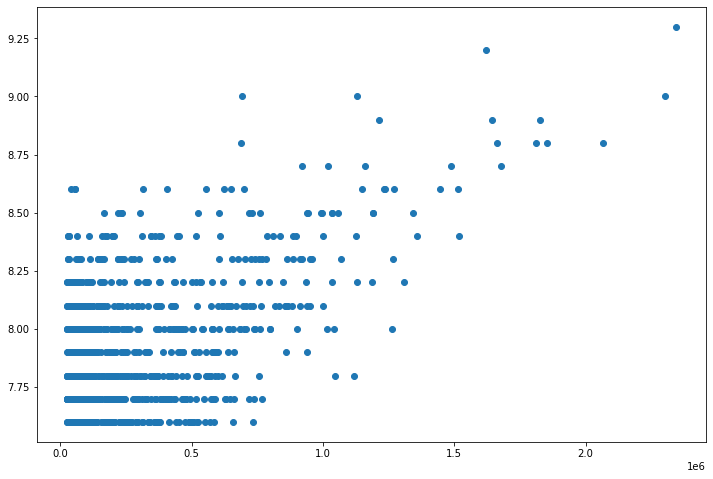

In [74]:
Tvotes = Data[["No_of_Votes","IMDB_Rating"]]
plt.scatter(Tvotes["No_of_Votes"],Tvotes["IMDB_Rating"])
plt.show()

In [75]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Tvotes)

print("Cluster Centers are at:",kmeans.cluster_centers_)

Cluster Centers are at: [[1.46016189e+05 7.89803922e+00]
 [8.39911418e+05 8.17663043e+00]]


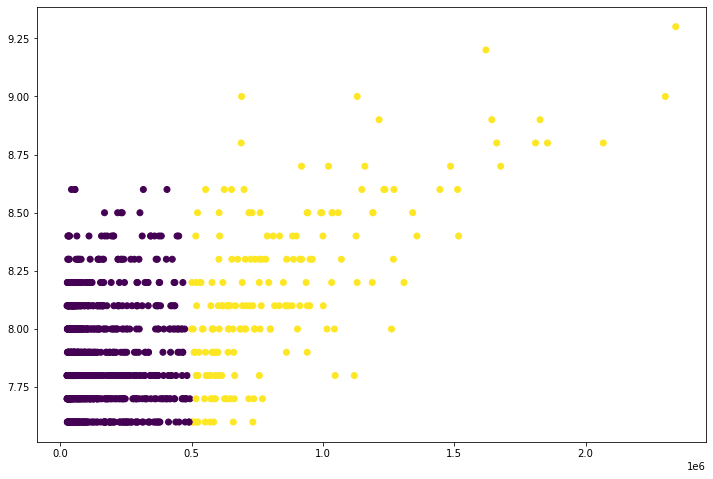

In [76]:
plt.scatter(Tvotes["No_of_Votes"],Tvotes["IMDB_Rating"],c=kmeans.labels_)
plt.show()

In [77]:
classLables = [0 if i<='140' else 1 for i in Data["Runtime"]]
PredictedLabels = kmeans.labels_

errors = 0
for i in range(len(classLables)):
    if(classLables[i]!=PredictedLabels[i]):
        errors = errors+1
        
print("There are",errors,"Mislabellings out of",len(classLables))
print("Accuracy: ",1-(errors/len(classLables)))

There are 430 Mislabellings out of 1000
Accuracy:  0.5700000000000001
